# digits データをさまざまな分類器にかけてみよう．

digitsは，手書き数字の認識用のデータベースである．irisデータに対して行った経験を活かして，digitsデータをいろいろな分類器で分類してみよう．

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
digits = datasets.load_digits()

digits データセットについては，データの保存形式などについて観察したことを思い出そう．（記憶が薄れた人は [digits001](https://bit.ly/2PVlFO1)を読み直そう．Python力がアップした今読むと，また新たな発見があるかも...）．

<img src="https://drive.google.com/uc?export=view&id=1oyE96ARxVNpPZl9H_pstUWno2cg4T6--" width = 60%>

In [ ]:
print("digits.data の shape は", digits.data.shape)
print("digits.target の shape は", digits.target.shape)

各クラスがそれぞれいくつのデータを含むのか確認する．（既に見たように，別解はたくさんあります）[digits001の練習課題](https://colab.research.google.com/drive/1t7_JQwsNl2UbL94KeGYc0eSctQu46Zyp#scrollTo=Frnist2ihj5R&line=3&uniqifier=1)

In [ ]:
import collections
c = collections.Counter(digits.target)
print(c)

# 2クラス分類

digitsには 0,1,...,9 の10個のクラスがあるが，まずは2クラス分類を行おう．ここでは例題として，数字の1と7を見分ける問題に取り組む．特徴量は制限せずに 8×8=
64すべてを用いる．

In [ ]:
## class 1 と class 7 をすべての特徴量を使って分類する．
X = digits.data[np.isin(digits.target, [1,7])]
y = digits.target[np.isin(digits.target, [1,7])]

print(f"X.shape = {X.shape}, y.shape = {y.shape}")

In [ ]:
182+179    # 個数があっているかどうか検算してみる．

In [ ]:
i = 0     # この指定を 0 ～ 360 の範囲で変えてみよう．
print(f"class[{i}] = {y[i]}")
# print(X[i])
# print(X[i].reshape(8,8))
plt.imshow(X[i].reshape((8, 8)), cmap="gray_r")
plt.show()

## 練習課題

*   他の画像も表示してみよう．1行目の `i = 0` の値
0 を 0～360の範囲で変えてコードセルを再実行すればよい．for文で回していくつかをまとめて表示する方法もある．また，使いやすいように`i` を引数とする関数にしておいてもよいだろう．





## Scikit-learn の分類器による2クラス分類

irisデータに対して行ってきたのと同様に，scikit-learnで提供されているいくつかの分類器を用いて digitsデータの2クラス分類を行ってみよう．

### ロジスティック回帰

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500, tol=0.1)

### ホールドアウト検証

ここではデータセットを訓練用とテスト用に 7:3の比率で分割したホールド検証を行う．

<img src="https://drive.google.com/uc?export=view&id=1Vi9kH-uBvB9kKlX1zqdctH0-34M3JPmC" width = 45%>

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)
model.fit(train_X, train_y)
accuracy_for_train = model.score(train_X, train_y)
accuracy_for_test  = model.score(test_X,  test_y)
print("訓練データに対する精度  :", accuracy_for_train)
print("テストデータに対する精度:", accuracy_for_test)

### 交差検証 ($k$分割交差検証)

ホールドアウト検証よりも少し手間はかかるが，より信頼度の高い検証方法として，**交差検証** (crosss-validation) がある．$k$-分割交差検証 ($k$-fold coross-validation) は，データセットをランダムに$k$個のグループに分割し，そのうちの1つをテスト用に，残りの$k-1$個を訓練用に使う．これを$k$回行った平均で1つの推定を得る方法である．



<img src="https://drive.google.com/uc?export=view&id=1M_2MFdobspV2j4Ya_zUlbwramL9hE-hu" width = 90%>

scikit-learn には$k$分割交差検証を行う関数`cross_val_score`も含まれており，オプション引数`cv`で分割数$k$を指定することができる．得られる結果は$k$個のスコアベクトルである．

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=10) 
print(scores)           # デバッグ目的の表示
print("10分割交差検証による精度:", scores.mean())  # scores の平均値

##  練習問題



*   他の分類器を使って，2クラス分類問題を行ってみよう．以下に，主な呼び出し方を示しておく．それぞれについて，検証も行ってみよう．
*   他の数字の組合せについて，2クラス分類をおこなってみよう．例えば，1 と 7 の識別は 1 と 8 の識別よりも難しいだろうか？


### パーセプトロン (Perceptron)

```
from sklearn.linear_model import Perceptron
model = Perceptron()
```

### 多層パーセプトロン (Multi-layer Perceptron)

```
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
```

### 線形サポートベクトルマシン (Support Vector Machine, SVM)

```
from sklearn.svm import LinearSVC
model = LinearSVC()
```

### 非線形サポートベクトルマシン 

```
from sklearn.svm import SVC
model = SVC()
```

### 決定木 (Decision Tree)


```
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
```

### ランダムフォレスト (Random Forest)

```
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
```

### k近傍法 (k-Neighbours)

```
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
```




# 多クラス分類

では，0,1,2,..., 9 の10クラスをまとめて多クラス分類を行ってみよう．

In [ ]:
X = digits.data
y = digits.target
print(f"X.shape = {X.shape}, y.shape = {y.shape}")

In [ ]:
# 以下の説明の中で乱数要素を排除するために random_state を固定した． 
model = LogisticRegression(max_iter=500, tol=0.1, random_state=88)   

### ホールドアウト検証

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=88)
model.fit(train_X, train_y)
accuracy_for_train = model.score(train_X, train_y)
accuracy_for_test  = model.score(test_X,  test_y)
print("訓練データに対する精度  :", accuracy_for_train)
print("テストデータに対する精度:", accuracy_for_test)

注：分類が容易ではない問題に対して，分類器を実行すると，場合によっては警告 (FutureWarnings など) がたくさん表示されることがある．基本的には，これらの警告（必ずしもエラーではない）が表示される原因を確認してから，必要に応じて対処することが望ましい．例えば  
```
ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
```
が出るときは，これを消すために `max_iter=1000` や `tol=0.1` を設定したり，その数値を変えたりして再実行を行ってみるとよい．

しかしながら，ここではそれほど本質的ではない警告のために説明が分断されるのを避けるためにいったん警告文を非表示しておくことにする．



In [ ]:
import warnings    # 詳しくは https://docs.python.jp/3/library/warnings.html
warnings.filterwarnings('ignore')
# # warnings.filterwarnings('default')  # 警告を表示したいとき

### 交差検証

In [ ]:
scores = cross_val_score(model, X, y, cv=10)  
print(scores)     # デバッグ目的の表示
print("10分割交差検証による精度:", scores.mean())

# 評価の指標

## 混同行列 (Confusion Matrix)

予測結果を実際のデータと照らし合わせて分析するために有用なものとして，**混同行列**がある．対応を確認しやすいように，小さなデータを作ってみよう．

In [1]:
from sklearn.metrics import confusion_matrix

y_true = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1]     # 実際
y_pred = [0, 0, 0, 0, 1, 1, 1, 1, 0, 1]     # 予測

confusion_matrix(y_true, y_pred)

array([[4, 2],
       [1, 3]])

各クラスを並べる順番を明示的に指定したいときは，オプション引数 `labels` を指定すればよい．(指定しなかったときは，`y_true` や `y_pred` に出現する順に並べられる)


In [ ]:
confusion_matrix(y_true, y_pred, labels=[0,1])

上の混同行列は次のように読めばよい．
<table>
  <tr>
   <th> </th>
   <th> </th>
  <th colspan=2> 予測 </th>
</tr>
<tr>
  <td> </td>
  <td>  </td>
  <td> 0 </td>
  <td> 1 </td>
</tr>
<tr>
  <td rowspan=2> 実際 </td>
  <td>0</td>
  <td> 4 </td>
  <td> 2</td>
</tr>
<tr>
  <td> 1 </td>
  <td> 1 </td>
  <td> 3 </td>
</tr>
</table>

In [ ]:
confusion_matrix(y_true, y_pred, labels=[1,0])

同様に上の混同行列は次のように読める．
<table>
  <tr>
   <th> </th>
   <th> </th>
  <th colspan=2> 予測 </th>
</tr>
<tr>
  <td> </td>
  <td>  </td>
  <td> 1 </td>
  <td> 0 </td>
</tr>
<tr>
  <td rowspan=2> 実際 </td>
  <td>1</td>
  <td> 3 </td>
  <td> 1</td>
</tr>
<tr>
  <td> 0 </td>
  <td> 2 </td>
  <td> 4 </td>
</tr>
</table>

クラスの指定が0や1のような整数ではなく，文字列で表されていても使える．

In [ ]:
 y1_true = ["dog", "dog", "cat", "dog", "dog", "cat", "dog", "cat"]
y1_pred = ["cat", "dog", "cat", "cat", "dog", "cat", "dog", "dog"] 

confusion_matrix(y1_true, y1_pred, labels=["dog","cat"])

<table>
  <tr>
   <th> </th>
   <th> </th>
  <th colspan=2> 予測 </th>
</tr>
<tr>
  <td> </td>
  <td>  </td>
  <td> dog </td>
  <td> cat </td>
</tr>
<tr>
  <td rowspan=2> 実際 </td>
  <td>dog</td>
  <td> 3 </td>
  <td> 2</td>
</tr>
<tr>
  <td> cat </td>
  <td> 1</td>
  <td> 2</td>
</tr>
</table>

また，3つ以上のクラスに対しても使える．

In [ ]:
y2_true = ['C', 'A', 'B', 'C', 'C', 'C', 'A', 'A', 'B', 'B', 'B', 'B']
y2_pred = ['C', 'B', 'B', 'C', 'B', 'C', 'B', 'A', 'B', 'C', 'C', 'A'] 

confusion_matrix(y2_true, y2_pred, labels=['A', 'B', 'C'])

<table>
  <tr>
   <th> </th>
   <th> </th>
  <th colspan=3> 予測 </th>
</tr>
<tr>
  <td> </td>
  <td>  </td>
  <td> A </td>
  <td> B </td>
  <td> C </td>
</tr>
<tr>
  <td rowspan=3> 実際 </td>
  <td>A</td>
  <td> 1 </td>
  <td> 2</td>
  <td> 0</td>
</tr>
<tr>
  <td> B </td>
  <td> 1</td>
  <td> 2</td>
  <td> 2</td>
</tr>
<tr>
  <td> C </td>
  <td> 0</td>
  <td> 1</td>
  <td> 3</td>
</tr>
</table>

混合行列の対角成分以外が 0 になるような分類器を得ることが理想的である．

<table>
  <tr>
   <th> </th>
   <th> </th>
  <th colspan=3> 予測 </th>
</tr>
<tr>
  <td> </td>
  <td>  </td>
  <td> A </td>
  <td> B </td>
  <td> C </td>
</tr>
<tr>
  <td rowspan=3> 実際 </td>
  <td>A</td>
  <td> 3 </td>
  <td> 0</td>
  <td> 0</td>
</tr>
<tr>
  <td> B </td>
  <td> 0</td>
  <td> 5</td>
  <td> 0</td>
</tr>
<tr>
  <td> C </td>
  <td> 0</td>
  <td> 0</td>
  <td> 4</td>
</tr>
</table>

## 正解率，適合率，再現率，F値

2クラス分類に話を戻そう．２つのクラスのうち，一方に属するものを**正の例** (positive example)，他方を**負の例** (negative example) とする．

<table>
  <tr>
   <th> </th>
   <th> </th>
  <th colspan=2> 予測 </th>
</tr>
<tr>
  <td> </td>
  <td>  </td>
  <td> Positive </td>
  <td> Negative </td>
</tr>
<tr>
  <td rowspan=2> 実際 </td>
  <td>Positive</td>
  <td> True Positive $\mathit{TP}$ </td>
  <td> False Negative $\mathit{FN}$ </td>
</tr>
<tr>
  <td> Negative </td>
  <td> False Positive $\mathit{FP}$ </td>
  <td> True Negative $\mathit{TN}$ </td>
</tr>
</table>

*   True Positive (真陽性)
*   False Negative (偽陰性)
*   False Positive (偽陽性)
*   True Negative (真陽性)

応用例によっては，偽陽性と偽陰性の重要度が異なることがあるので，これらを考慮したいくつかの指標が用いられている．


**正解率** (Accuracy) 

$\mathit{Accuracy} = \frac{\mathit{TP} + \mathit{TN}}{\mathit{TP} + \mathit{FP} + \mathit{TN} + \mathit{FN}}$

**適合率** (Precision) 

$\mathit{Precision} = \frac{\mathit{TP}}{\mathit{TP} + \mathit{FP}}$


**再現率** (Recall)

$\mathit{Precision} = \frac{\mathit{TP}}{\mathit{TP} + \mathit{FN}}$


**F値, F尺度，F1値** (f-score, f-measure, f1-score) 

適合率と再現率の**調和平均**

$\mathit{F_1} = \frac{2}{\frac{1}{\mathit{Precision}} + \frac{1}{\mathit{Recall}}} = \frac{2 \cdot\mathit{Precision}\cdot\mathit{Recall} }{\mathit{Precision} + \mathit{Recall}}$





これらの指標を求める関数は scikit-learn ライブラリに含まれているので import するだけで簡単に使える．

In [ ]:
confusion_matrix(y_true, y_pred, labels=[1,0])  # 再掲

(再掲）
<table>
  <tr>
   <th> </th>
   <th> </th>
  <th colspan=2> 予測 </th>
</tr>
<tr>
  <td> </td>
  <td>  </td>
  <td> 1 </td>
  <td> 0 </td>
</tr>
<tr>
  <td rowspan=2> 実際 </td>
  <td>1</td>
  <td> 3 </td>
  <td> 1</td>
</tr>
<tr>
  <td> 0 </td>
  <td> 2 </td>
  <td> 4 </td>
</tr>
</table>

In [ ]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score

print("正解率は", accuracy_score(y_true, y_pred))
print("適合率は", precision_score(y_true, y_pred))
print("再現率は", recall_score(y_true, y_pred))
print("F値は",    f1_score(y_true, y_pred))

また，これらの関数にオプション引数 `pos_label=0` と指定することで，正の例のラベルを 0 であると指定できる．これは次の混同行列に相当する(デフォルトでは `pos_label=1`となっている）．ただし，正解率 (`accuracy_score`) は，どちらを正の例とみなしても値が変わらないので，このオプション引数を持たない．
<table>
  <tr>
   <th> </th>
   <th> </th>
  <th colspan=2> 予測 </th>
</tr>
<tr>
  <td> </td>
  <td>  </td>
  <td> 0 </td>
  <td> 1 </td>
</tr>
<tr>
  <td rowspan=2> 実際 </td>
  <td>0</td>
  <td> 4 </td>
  <td> 2</td>
</tr>
<tr>
  <td> 1 </td>
  <td> 1 </td>
  <td> 3 </td>
</tr>
</table>

In [ ]:
print("正解率は", accuracy_score(y_true, y_pred))
print("適合率は", precision_score(y_true, y_pred, pos_label=0))
print("再現率は", recall_score(y_true, y_pred, pos_label=0))
print("F値は",    f1_score(y_true, y_pred, pos_label=0))

# digitsデータの分類に関する混同行列

どんな間違いをしているのかを確認するために，**混同行列**を表示してみよう．

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=88)
model.fit(train_X, train_y)
accuracy_for_train = model.score(train_X, train_y)
accuracy_for_test  = model.score(test_X,  test_y)
print("訓練データに対する精度  :", accuracy_for_train)
print("テストデータに対する精度:", accuracy_for_test)

test_y_pred = model.predict(test_X)
print("正解率は", accuracy_score(test_y, test_y_pred))
confusion_matrix(test_y, test_y_pred, labels=[0,1,2,3,4,5,6,7,8,9])

### 誤分類するデータを観察しよう

間違っている例を個別に取り出して観察してみることにしよう．

このモデルによる予測結果は `test_y_pred` に格納されており，一方，正しいラベルは `test_y` に格納されている．
この値が食い違っているところを抽出すればよい．

In [ ]:
for i in range(len(test_y)):
    if test_y[i] != test_y_pred[i]:
        print(f"i={i:3d}, 正解: {test_y[i]}, 予測: {test_y_pred[i]}")

In [ ]:
i = 496     # 上のセルで表示された i の値を入れて，目で見て確認しよう．
print(f"class[{i}] = {test_y[i]}")
plt.imshow(test_X[i].reshape((8, 8)), cmap="gray_r")
plt.show()

このくらいのデータ量であれば一覧できるが，データが大規模になったときのために，集計する練習をしてみよう．
例えば上の結果を眺めると，「正解: `8`, 予測: `1`」となる `i` は `145`, `352`, `424`, `434`, `448` の5つである．そこで，これらを要素とするリスト`[145, 352, 424, 434, 448]`を，キー`(8, 1)`に登録する辞書として構築してみよう．

基本的な考え方は次の通りである．
1.   正解 `test_y[i]` と 予測 `test_y_pred[i]` が異なる `i` について，タプル `(test_y[i], test_y_pred[i])` をキーとする．（4～6行目）
2.  既にこのキーが辞書の中に登録済みならば，そのリストに `i` を追加する．(7～8行目)
3.  まだこのキーが辞書の中に登録されていなかったら，`i` だけを要素とするリスト `[i]` を辞書に登録する．(9～10行目)


In [ ]:
diff_dict = dict()       # diff_dict = {} と書いてもよい

for i in range(len(test_y)):
    if test_y[i] != test_y_pred[i]:
        # print(i, test_y[i], test_y_pred[i])
        key = (test_y[i], test_y_pred[i])
        if key in diff_dict:
            diff_dict[key].append(i)
        else:
            diff_dict[key] = [i]

# 辞書の中味を表示する．
for k, v in diff_dict.items():
  print(k, v)

## 補足：辞書のちょっと高度な使い方

辞書の「getメソッド」を使えば，上のプログラムの6行目の
```
if key in diff_dict
```
の場合分けが不要になる．（関連情報：[Python007: 辞書のgetメソッドの利用](https://colab.research.google.com/drive/1nq4u4Sy1FlUH6LDIXVVG68xQh0skHxxF#scrollTo=oWDnANkYRhGZ)）

In [ ]:
diff_dict = dict()

for i in range(len(test_y)):
    if test_y[i] != test_y_pred[i]:
    #     print(i, test_y[i], test_y_pred[i])
        key = (test_y[i], test_y_pred[i])
        diff_dict[key] = diff_dict.get(key, []) + [i]

for k, v in diff_dict.items():
    print(k, v)


ただし，上のプログラムの7行目を

```
diff_dict[key] = diff_dict.get(key, []).append(i)
```
と書くと期待通りには動かないので注意しよう．

さらに，Python標準ライブラリの `collections.defaultdict` を用いると，もっとすっきりと書くことができる．（関連情報：[Python007: defaultdict の利用](https://colab.research.google.com/drive/1nq4u4Sy1FlUH6LDIXVVG68xQh0skHxxF#scrollTo=oWDnANkYRhGZ)）

In [ ]:
from collections import defaultdict

diff_dict = defaultdict(list)    # ディクショナリの各valueの初期値を空リスト [] にする．

for i in range(len(test_y)):
    if test_y[i] != test_y_pred[i]:
    #     print(i, test_y[i], test_y_pred[i])
        key = (test_y[i], test_y_pred[i])
        diff_dict[key].append(i)    # defaultdict のおかげで，keyの存在判定をせずに appendできる．

for k, v in diff_dict.items():
    print(k, v)

## 閑話休題

このままでは少し読みにくいので，並べ直して表示することにしよう．

`diff_dict` に格納されているデータを取り出す際に，key となっている `(i, j)` について並び替えてから表示したいときは，`dict.keys()` で取り出したkeyのリストを `sorted( )` 関数を使って**ソート** (sort)すればよい．

In [ ]:
for k in sorted(diff_dict.keys()):
    print(k, diff_dict[k])

## 練習課題

*   ここで求めた`diff_dict`の出力結果が，上記の**混同行列**と整合性がとれていることを確認しよう．例えば
```python
(8, 1) [145, 352, 424, 434, 448]
```
ということから，'8'のつもりで書かれた数字を'1'と誤認識しているデータが5つあるはずだが，これは混同行列のどの要素に対応するだろうか．



diff_dictの出力結果をいくつか，目で見て確認しよう．
例えば 
```python
(3, 2) [258]
```
の行は，`test_X[258]` が正しくは '3' のはずだが，我々の予測器が '2'と誤分類していることを示している．試しに表示してみよう．

In [ ]:
i = 258
print(f"class[{i}] = {test_y[i]}")
plt.imshow(test_X[i].reshape((8, 8)), cmap="gray_r")
plt.show()

人の目には '3' に見えるが，我々の分類器 `model` は本当にこれを誤分類したのだろうか．念のため確かめてみよう．(注： `model.predict( )` に渡すものはリストまたは `np.ndarray` なので `test_X[258]` をそのまま渡すのではなく， `[ test_X[258] ]` または `np.array([ test_X[258] ])` として渡す必要がある） 

In [ ]:
model.predict([test_X[258]])

確かに誤分類しているようだ．

# 練習課題

*   誤分類されているデータを表示して，なぜ誤分類されてしまったのかを考えてみよう．
*   どのデータが誤分類されるかは，分類器やそのオプション設定に依存するが，多くの分類器で誤分類されるデータ（すなわち，誤分類されやすい紛らわしいデータ）も存在するだろう．それを探してみよう．

# 次元削減　（次元縮小）

irisのデータで，特徴量を 2 つに制限した場合は，2次元座標に表示することで視覚的にとらえることができた．3次元までならば，3次元空間に表示することで視覚化ができる．しかしながら4次元以上になるとそうはいかなくなる．

ここで扱っている digits データは，8×8=64次元のデータであり，簡単には可視化することができないが，クラスの分類に寄与している度合いの高い次元をいくつか（3つ程度）取り出すことで，概要をつかみやすくなる．この次元削減（次元縮小）を行ってみよう．

以下に，最も基本的な手法である主成分分析(PCA)と，機械学習分野でよく用いられている t-SNE, そして最近注目の UMAP の3つの使い方を紹介する．PCAとt-SNE はscikit-learn に収められており，UMAP も colaboratory の中でインストール済みなので，いずれも統一的な方法で使えるようになっている．どの方法も，`X` だけをみて次元削減を行っていることに注意しておこう（すなわち，クラス情報`y`を考慮しているわけではない）．

## 主成分分析 (PCA)

主成分分析 (Principal Component Analysis, PCA)は代表的な次元削減アルゴリズムである．もとの特徴空間から，線形変換によって低次元の空間に変換する．この際，分散がなるべく大きくなるような射影を求める．

線形変換（一次変換ともいう）というのは，行列の積で表されるような変換で，例えば次の例は5次元のデータ $(x_1,x_2,x_3,x_4,x_5)$ を2次元のデータ$(y_1, y_2)$に変換する．

$
\begin{pmatrix}
x_1 & x_2 & x_3 & x_4 & x_5
\end{pmatrix}
\begin{pmatrix}
a & b \\
c & d \\
e & f \\
g & h \\
i & j \\
\end{pmatrix}
= 
\begin{pmatrix}
y_1 & y_2 \\
\end{pmatrix}
$

In [ ]:
X.shape

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)     # 主成分分析
Xpca = pca.fit_transform(X)    # 64次元のXを3次元に次元削減

In [ ]:
Xpca.shape

In [ ]:
print(Xpca)

Xpca は3次元のデータに削減されたので，3次元の世界で可視化できる．matplotlib の散布図として描画してみよう．

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw3d_plt(X3, y):
    assert X3.shape[1] == 3   # 3次元のデータのみ可視化する．
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(X3[:,0], X3[:,1], X3[:,2], c=y, cmap="prism")
    plt.show()

In [ ]:
draw3d_plt(Xpca, y)

## plotly でグリングリン動かす

3次元の表示に plotly が好評だったので，ここでも使ってみよう．なお，この配色は上記の matplotlib に合わせているわけではないので，好きなように書き直してもよい．

In [ ]:
import plotly.graph_objects as go

# 色見本：http://www.htmq.com/color/colorname.shtml を見て好きな配色に変えてもよい．
#     注：この配色は，matplotlib.plt で表示したものに対応させているわけではありません．
colormap = ["red", "blue", "green", "yellow", "magenta", "lime", "purple", "midnightblue", "darkorange", "cyan"]

def draw3d_plotly(X3, y):
    assert X3.shape[1] == 3   # 3次元のデータのみ可視化する．
    tracelist = []
    for i in range(10):
        trace = go.Scatter3d(
                x=X3[y==i,0], y=X3[y==i,1], z=X3[y==i,2], mode='markers',
                marker=dict(color=colormap[i], opacity=0.6, size=5), name=f"class {i}")
        tracelist.append(trace)

    layout = go.Layout(scene=dict(aspectmode='cube'))
    fig = go.Figure(data=tracelist, layout=layout)
    fig.show()

In [ ]:
draw3d_plotly(Xpca, y)

## t-SNE

**t分布型確率的近傍埋め込み**(t-distributed Stochastic Neghbor Embedding: t-SNE) は非線形の次元圧縮手法である．PCAに比べて計算時間はかかるが，線形変換では得られない，元の特徴をよく保った次元削減が行えるので機械学習分野でよく用いられている．

In [ ]:
from sklearn.manifold import TSNE

t_sne = TSNE(n_components=3)
Xtsne = t_sne.fit_transform(X) # 64次元のXを t-SNE で3次元に次元削減

In [ ]:
# draw3d_plt(Xtsne, y)
draw3d_plotly(Xtsne, y)

## UMAP

UMAP (Uniform Manifold Approximation and Projection)
は，2018年2月に発表された新しい非線形の次元圧縮法で， t-SNE よりも高速に動作することとから注目が高まっている．

UMAPは現在，colaboratory に標準ではインストールされていないので手動でインストールを行う．

In [ ]:
!pip install umap-learn

In [ ]:
from umap import UMAP

umap3 = UMAP(n_components=3)
Xumap = umap3.fit_transform(X)   # 64次元のXを UMAP で3次元に次元削減

In [ ]:
# draw3d_plt(Xumap, y)
draw3d_plotly(Xumap, y)

## 2次元への次元削減

次元数を3まで削減すれば，plotly を使って3次元空間でグリングリンできるが，レポートや論文に静止画として描画するときなど，2次元の方が都合がよいことも多いだろう．上で紹介したそれぞれの次元削減法において，`n_components=2` と指定すればよい

描画用に，matplotlib.plt版とplotly版の両方を作っておくので，好きな方を使ってください．

In [ ]:
def draw2d_plt(X2, y):
    assert X2.shape[1] == 2   # 2次元のデータのみ可視化する．
    plt.scatter(X2[:,0], X2[:,1], c=y, cmap="prism")
    plt.show()


def draw2d_plotly(X2, y):
    assert X2.shape[1] == 2   # 2次元のデータのみ可視化する．
    tracelist = []
    for i in range(10):
        trace = go.Scatter(
                x=X2[y==i,0], y=X2[y==i,1],mode='markers',
                marker=dict(color=colormap[i], opacity=0.6, size=5), name=f"class {i}")
        tracelist.append(trace)
        
    fig = go.Figure(data=tracelist)
    fig.show()

### 主成分分析 (PCA)

In [ ]:
pca2 = decomposition.PCA(n_components=2)    
Xpca2 = pca2.fit_transform(X)

# draw2d_plt(Xpca2, y)
draw2d_plotly(Xpca2, y)

### t-SNE

In [ ]:
t_sne2 = TSNE(n_components=2)
Xtsne2 = t_sne2.fit_transform(X) # 64次元のXを t-SNE で2次元に次元削減

# draw2d_plt(Xtsne2, y)
draw2d_plotly(Xtsne2, y)

### UMAP

In [ ]:
umap2 = UMAP(n_components=2)
Xumap2 = umap2.fit_transform(X)   # 64次元のXを UMAP で2次元に次元削減

# draw2d_plt(Xumap2, y)
draw2d_plotly(Xumap2, y)

# まとめ

*   digitsデータに対しても，分類や可視化を容易に行うことができた．
*   次元削減によって，データの性質を極力保ちながら低次元のデータに変換することができた．3次元や2次元に削減することで可視化が行いやすくなった．また，特徴量がとても多いデータに対して，そのまま分類器にかけると計算時間がかかりすぎるような場合に，次元削減を行ってから分類器にかけることもある．またその際に，比較的高速な PCA である程度まで次元を削減してから，2段階目で別の次元削減法 (t-SNEやUMAP）を行うこともある．


# C0TB1060 蒲原紳乃輔

# レポート課題

## 1.Cross Validationによるモデルの評価

## 2.PCA(主成分分析)による材料特性評価

主成分分析は多次元データを次元の低い部分ベクトル空間に写像する線形変換のことである。例えば、分類の問題であれば全部の特徴量を使わず、少ない特徴量データで正解できるのは非常に好ましい。なので、元データの情報を最大限残したままデータを圧縮する教師無し学習としてPCAはとても優れている。

### 材料特性データを用いた分類
今回は主成分分析を用いて分類を行うのはいつものようなiris digitsでもよかったのだが、それでは少々つまらない。なので少し異なるデータを用いてみる。自分は将来材料科学を専門に頑張っていくことになるので、それに関連したtopicを扱ってみようと思う。data.worldと呼ばれるデータセットが手に入れられるサイトがあるが、そこから金属材料の物性データと各金属の名称が記録されたデータセットがある。今回はこのデータセット、PCA、適当な分類器を用いて一体どれくらいの特徴量データで金属材料は分類できるのかやってみる。

### PCAの自作ライブラリー
sklearnにはpcaを実装してくれるライブラリーがあるが、今回は勉強のために全部実装してみる。春休みにPCAの理論も同時に勉強したので参考までにノートを上げておく
理論に基づき実装を行う\
参考: https://drive.google.com/file/d/1ZuYQ6998y8cCgkpaBA1niOvcknt8FE45/view?usp=sharing

In [72]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class PCA(object):
  def __init__(self):
    pass
  
  def fit(self,X,labels):
    #データの標準化
    X_std = (X - X.mean()) /X.std()

    #特徴量データの名称
    self.labels = labels

    #共分散行列の定義
    cov_matrix = np.cov(X_std.T)

    #共分散行列と線形結合の定数の関係を示す固有値方程式を解く
    self.eigen_vals,self.eigen_vecs = np.linalg.eig(cov_matrix)
    print(self.eigen_vals)

    #固有値の大きい順に並べ、固有値:固有ベクトルを格納する配列を新たに定義する
    self.eigen_pairs = [(self.eigen_vals[i],self.eigen_vecs[i],self.labels[i]) for i in range(len(self.eigen_vals))]
    self.eigen_pairs.sort(reverse=True)

    #主成分の個数を指定した後、固有値をその個数分つなげた配列を生成する
    self.w_ = np.hstack((self.eigen_pairs[i][1][:,np.newaxis] for i in range(int(X.shape[1]/3))))

    #線形変換によりXをX_pcaに変換する
    self.X_pca = X_std.dot(self.w_)
  
  def fit_transform(self):
    return self.X_pca 
  
  def cont_rate(self):
    self.eigen_vals_sum = np.sum(self.eigen_vals)
    for i in range(len(self.eigen_vals)):
      print('index',np.argsort(self.eigen_vals)[::-1][i],'contribution_rate = ',((100/self.eigen_vals_sum)*np.sort(self.eigen_vals)[::-1][i]).real,'%')

### irisデータで実験
ちゃんと動くか試すために、一応irisデータで試してみる

In [73]:
#まずはirisで実験
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target 
feature_names = iris.feature_names
labels = [(i) for i in range(X.shape[1])]
labels = np.array(labels)

pca = PCA()
pca.fit(X,labels)
X_pca = pca.fit_transform()

X_pca

[1.08526193 0.06228625 0.02007402 0.00611775]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


array([[ 3.74615172e-01],
       [ 5.04320047e-01],
       [ 4.30660651e-01],
       [ 3.86642079e-01],
       [ 3.23041904e-01],
       [ 2.39988943e-01],
       [ 3.32319155e-01],
       [ 3.60083739e-01],
       [ 4.46040632e-01],
       [ 4.25585022e-01],
       [ 3.33525400e-01],
       [ 2.93979039e-01],
       [ 4.70027868e-01],
       [ 4.66945384e-01],
       [ 3.95428477e-01],
       [ 1.87567127e-01],
       [ 3.57937500e-01],
       [ 3.90598570e-01],
       [ 3.12196373e-01],
       [ 2.61317969e-01],
       [ 3.74344583e-01],
       [ 3.10565854e-01],
       [ 3.67755339e-01],
       [ 4.00632923e-01],
       [ 2.05517621e-01],
       [ 4.63654549e-01],
       [ 3.62563396e-01],
       [ 3.63436813e-01],
       [ 4.26188439e-01],
       [ 3.42199233e-01],
       [ 3.93772501e-01],
       [ 4.65285657e-01],
       [ 1.47866492e-01],
       [ 2.14998883e-01],
       [ 4.41568420e-01],
       [ 5.15074132e-01],
       [ 4.77337433e-01],
       [ 2.88749726e-01],
       [ 4.4

In [74]:
pca.cont_rate()

index 0 contribution_rate =  92.46187232017273 %
index 1 contribution_rate =  5.306648311706787 %
index 2 contribution_rate =  1.7102609807929656 %
index 3 contribution_rate =  0.5212183873275097 %


In [75]:
from sklearn.svm import SVC
svm = SVC()

svm.fit(X_pca,y)
y_pred = svm.predict(X_pca)
score = np.sum(y_pred==y) / y.shape[0]
print(score)

0.76


本来なら特徴量は4次元データであるのだが、pcaで2次元に削減しても90%以上の正答率が得られた。

### 材料特性データを用いての絶縁体・金属・半導体ー金属中間物質の分類
では実際に材料特性データを用いてPCAを行ってみよう

In [76]:
import pandas as pd
df = pd.read_excel('https://query.data.world/s/w4a54hdq7eg2xgrzud5sv42kfgqexm')

#欠損値が一つでもある場合取り除く
df = df.dropna(how='any')

feature_names = df.iloc[:,3:].columns.values
print("feature_names",feature_names) #特徴量の変数名
name = df.iloc[:,0]
print("")
print('name of compounds ',name.values)

feature_names ['range MendeleevNumber' 'avg_dev MendeleevNumber' 'range AtomicWeight'
 'mean AtomicWeight' 'avg_dev AtomicWeight' 'range MeltingT'
 'mean MeltingT' 'avg_dev MeltingT' 'range Column' 'avg_dev Column'
 'mode Column' 'range Row' 'mean Row' 'avg_dev Row' 'range CovalentRadius'
 'mean CovalentRadius' 'avg_dev CovalentRadius'
 'minimum Electronegativity' 'range Electronegativity'
 'mean Electronegativity' 'avg_dev Electronegativity'
 'mode Electronegativity' 'avg_dev NsValence' 'mode NsValence'
 'mean NpValence' 'avg_dev NpValence' 'range NdValence'
 'avg_dev NdValence' 'range NfValence' 'avg_dev NfValence'
 'minimum NValence' 'maximum NValence' 'range NValence' 'mean NValence'
 'avg_dev NValence' 'mode NValence' 'range NsUnfilled'
 'avg_dev NsUnfilled' 'minimum NpUnfilled' 'maximum NpUnfilled'
 'range NpUnfilled' 'mean NpUnfilled' 'avg_dev NpUnfilled'
 'mode NpUnfilled' 'range NdUnfilled' 'avg_dev NdUnfilled'
 'range NfUnfilled' 'avg_dev NfUnfilled' 'minimum NUnfilled'
 'ran

**データの説明** \

絶縁体、金属、金属ー半導体　の3クラス \

特徴量データ: 93個の特徴量データ \
1. 原子番号
2. 原子の重さ
3. 類番号
4. グループ番号
5. 族番号
6. L量子数
7. メンデレーエフ数
8. 原子半径(Å)
9. 共有結合半径(Å)
10. ツンガー半径(Å)
11. イオン半径(Å)
12. 結晶半径(Å)
13. ポーリングEN
14. マルティノフ-バトサノフEN
15. ゴーディ EN
16. マリケンEN
17. アレンEN
18. 金属の価数
19. 価電子の数
20. S電子の数
21. p電子の数
22. d電子の数
23. 外殻電子の数
24. 第一イオン化エネルギー(kJ/mol)
25. 分極性
26. 融点(K)
27. 沸点(K)
28. 密度(g/mL)
29. 比熱 (J/g-K)
30. 融合熱(kJ/mol)
34. 気化熱(kJ/mol)
35. 熱伝導率(W/m-K)
36. 霧化熱(kJ/mol)
37. 凝集エネルギー(eV)

これらのデータのうち、最大値、最小値、平均値、中央値を含む93次元のデータを取り扱う。上の処理で一つでも欠損が見られるデータは除外した。


全部の特徴量データを抽出し、numpy配列に変換する

In [77]:
X = []
for i in range(len(df.columns) -3):
  x = df.iloc[:,i+3].values
  X.append(x)

X = np.array(X)
X = X.T
y = np.array(df.iloc[:,1].values)
print(X.shape)
print(y.shape)

(228, 93)
(228,)


In [78]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X,y)
y_pred = lr.predict(X)
score = np.sum(y_pred==y) / y.shape[0]
print(score)

0.7456140350877193


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


pcaを呼び出し、次元削減を行う


In [79]:
labels = [(i) for i in range(X.shape[1])]
labels = np.array(labels)

pca = PCA()
pca.fit(X,labels)
X_pca = pca.fit_transform()

X_pca.shape

[ 3.11735240e+01  4.06970075e+00  2.51413357e-01  5.59525078e-02
  3.13484457e-02  1.31945778e-02  7.14657480e-03  4.46700247e-03
  2.29009429e-03  1.14033013e-03  6.92055619e-04  5.85568923e-04
  4.61056189e-04  4.42162594e-04  3.22532224e-04  2.75573557e-04
  1.51985626e-04  1.20685588e-04  9.50490790e-05  6.68848837e-05
  5.83711629e-05  5.41597733e-05  4.39001666e-05  3.98982562e-05
  2.94328486e-05  2.14851842e-05  1.52329657e-05  1.27948286e-05
  1.25708420e-05  1.08351552e-05  7.26430390e-06  6.30510854e-06
  6.06061917e-06  4.58420823e-06  3.84049034e-06  3.26329152e-06
  2.72507885e-06  2.46441645e-06  2.25958069e-06  1.78074326e-06
  1.57772109e-06  1.40959850e-06  1.10421316e-06  9.20139551e-07
  7.39766778e-07  7.18248123e-07  5.76600398e-07  4.38569298e-07
  4.01211573e-07  3.09713733e-07  2.83452078e-07  2.56958133e-07
  2.09183456e-07  1.86168060e-07  1.30990038e-07  1.17430947e-07
  1.06933673e-07  9.92280403e-08  7.36043875e-08  8.10564919e-08
  6.04667639e-08  5.58802

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


(228, 31)

In [80]:
pca.cont_rate()

index 0 contribution_rate =  87.5322937974018 %
index 1 contribution_rate =  11.427333077301537 %
index 2 contribution_rate =  0.705944821225014 %
index 3 contribution_rate =  0.1571093262740139 %
index 4 contribution_rate =  0.08802345751168834 %
index 5 contribution_rate =  0.03704912092955942 %
index 6 contribution_rate =  0.020066903112949272 %
index 7 contribution_rate =  0.012542918575177501 %
index 8 contribution_rate =  0.006430367221307603 %
index 9 contribution_rate =  0.00320193866347337 %
index 10 contribution_rate =  0.0019432264339025766 %
index 11 contribution_rate =  0.0016442219067862541 %
index 12 contribution_rate =  0.0012946019783922414 %
index 13 contribution_rate =  0.0012415505574411845 %
index 14 contribution_rate =  0.000905639843683796 %
index 15 contribution_rate =  0.0007737843687657201 %
index 16 contribution_rate =  0.00042676119912340353 %
index 17 contribution_rate =  0.00033887366506499044 %
index 18 contribution_rate =  0.00026688878415886497 %
index 

In [81]:
lr = LogisticRegression()

lr.fit(X_pca.real,y)
y_pred = lr.predict(X_pca.real)
score = np.sum(y_pred==y) / y.shape[0]
print(score)

0.6359649122807017


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


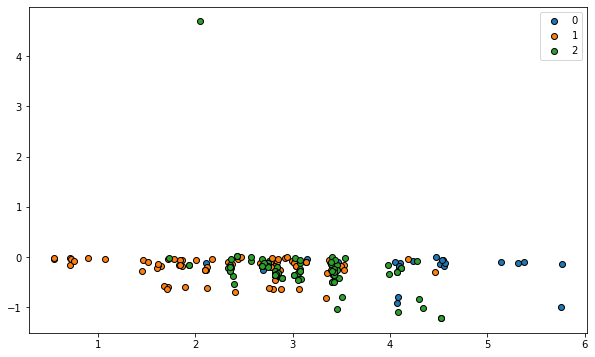

In [87]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6))
for label in np.unique(y):
  plt.scatter(X_pca[y==label][:,0],X_pca[y==label][:,25],label=label,edgecolors='k')
  plt.legend(loc="best")

plt.show()